In [1]:
import io

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from pyscanline import scanline


def apply_scanline_to_figure(fig, **scanline_kwargs):
    """
    Takes a Matplotlib Figure, exports it as an in-memory PNG,
    and applies the 'scanline' function to produce a retro-futuristic effect.

    Parameters
    ----------
    fig : matplotlib.figure.Figure
        A Matplotlib Figure object.
    **scanline_kwargs :
        Additional named arguments for the scanline() function.

    Returns
    -------
    PIL.Image.Image
        The resulting Pillow image after applying scanline.
    """
    # 1) Prepare an in-memory binary buffer.
    buf = io.BytesIO()
    # 2) Save the figure as a PNG into the buffer.
    fig.savefig(buf, format='png', dpi=fig.dpi, bbox_inches='tight')
    buf.seek(0)  # Reset buffer pointer to the beginning.

    # 3) Read the PNG from the buffer as a Pillow image, converted to RGB.
    pil_img = Image.open(buf).convert("RGB")

    # 4) Apply the scanline function.
    processed_img = scanline(pil_img, **scanline_kwargs)

    return processed_img

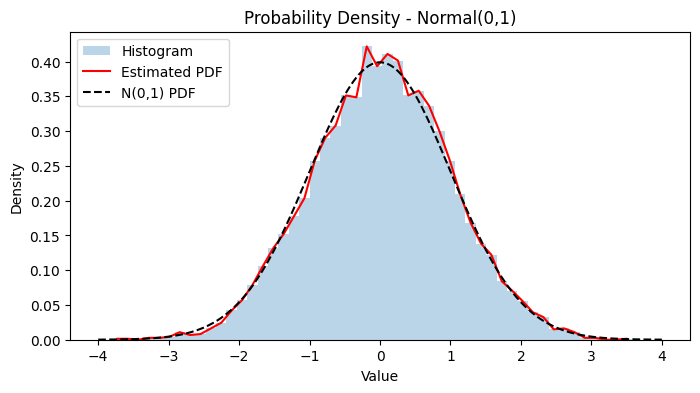

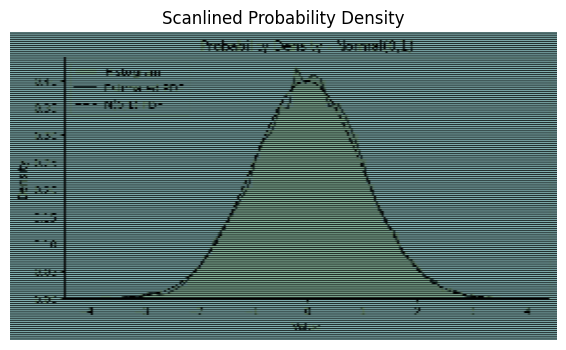

In [2]:
# 1) Generate random data from a normal distribution and visualize its density.
np.random.seed(123)
data = np.random.normal(loc=0.0, scale=1.0, size=5000)
fig_size = (8, 4)
fig, ax = plt.subplots(figsize=fig_size)
ax.set_title("Probability Density - Normal(0,1)")

# Plot a histogram and show its density.
counts, bins, patches = ax.hist(data, bins=50, density=True, alpha=0.3, label="Histogram")

# Plot the estimated PDF in red.
bin_centers = 0.5 * (bins[1:] + bins[:-1])
ax.plot(bin_centers, counts, 'r-', label="Estimated PDF")

# Compare with the theoretical standard normal (mean=0, sd=1).
xline = np.linspace(-4, 4, 200)
pdf_line = 1.0 / np.sqrt(2 * np.pi) * np.exp(-0.5 * xline**2)
ax.plot(xline, pdf_line, 'k--', label="N(0,1) PDF")

ax.legend(loc="upper left")
ax.set_xlabel("Value")
ax.set_ylabel("Density")

# 2) Apply the scanline effect to the Matplotlib figure.
out_img = apply_scanline_to_figure(
    fig,
    n_scanlines=160,
    scanline_col=("black", "darkslategrey", "#b4eeb4", "paleturquoise"),
    opacities=(1.0, 0.6, 0.0, 0.0, 0.6, 1.0),
    frame_size=0,
    border_size=0,
    normalise=True,
    # etc.
)

# 3) Save the resulting image or display it.
# out_img.save("scanlined_pdf.png")
# print("Saved scanlined probability density figure: scanlined_pdf.png")

# You can also display the Pillow image in a new Matplotlib figure:
plt.figure(figsize=fig_size)
plt.imshow(out_img)
plt.title("Scanlined Probability Density")
plt.axis("off")
plt.show()